In [1]:
# Map coloring
# resources allocation: schedule flights

### Constraints and Domain-Reduction Algorithm

Sequentially reduce the values domain ($x_i$, $D_i$) of each problem variable ($x_i$), eventually converging to a solution if it exists

* **Pseudo-code Domain Reduction Algorithm**
```python
    for each dfs assignment -j- (i.e. states in a map)
        for each variable v_i considered (*)
            for each value x_i of v_i domain D_i
                for each constraint C(x_i, x_j) where x_j belongs to D_j
                    if not exist x_j such C(x_i, x_j) satisfied
                        remove x_i from D_i
                    if D_i empty
                        backtracking (DFS)
```

- Possible outcomes:
1. No solution is found and DFS empties the queue, finishes before converging to anything
2. DFS takes longer than the age of the universe (bad)
3. algorithm takes too little to get to the solution (excess of resource allocated for this task, too many colors?)

In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from functools import partial

import networkx as nx 

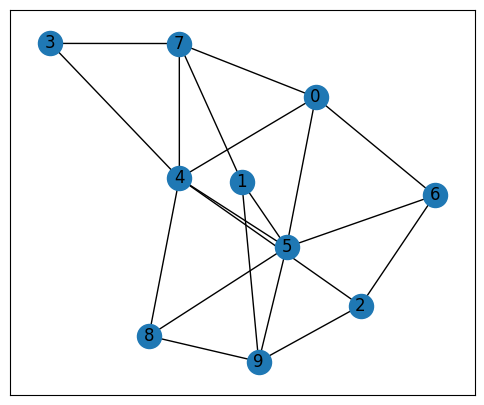

In [20]:
G = nx.erdos_renyi_graph(10, 0.4, seed=12)
positions = nx.spring_layout(G, seed=42)

fig, ax = plt.subplots(figsize=(6, 5))
nx.draw_networkx(G, pos=positions, ax=ax)
plt.show()

In [ ]:
NODE_DEFAULT_COLOR = "#0064e1"

def update(ax, G, node_positions, title, frame):
    ax.clear()
    ax.axis("off")
    ax.set_title(title, horizontalalignment="left")
    background_nodes = nx.draw_networkx_nodes(
        G, nodelist=G.nodes(), pos=node_positions, node_color=NODE_DEFAULT_COLOR, ax=ax,
    )

    graph_edges = nx.draw_networkx_edges(G, pos=node_positions, ax=ax)

    if len(frame) > 1:
        path_edges = nx.draw_networkx_edges(
            G,
            edgelist=[(a, b) for a, b in zip(frame[:-1], frame[1:])],
            pos=node_positions,
            edge_color="red",
            width=1.5,
            ax=ax,
        )

    visited_nodes = nx.draw_networkx_nodes(
        G, nodelist=frame, pos=node_positions, node_color="red", ax=ax
    )

    nodes_labels = nx.draw_networkx_labels(
        G, pos=node_positions, labels={k: k for k in G.nodes}, ax=ax
    )


def animate_search(fig, ax, G, node_positions, title, explored_paths, interval=500):
    return animation.FuncAnimation(
        fig,
        partial(update, ax, G, node_positions, title),
        interval=interval,
        frames=explored_paths,
        repeat=False,
    )

In [ ]:
def domain_reduction():
    pass